In [1]:
import numpy as np

In [2]:
detector_array = np.zeros((500, 500))
print(detector_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
pixel_edge_length = 15 #microns
pixel_half_length = (pixel_edge_length / 2)
num_of_pixels = 500
num_of_pixel_x = 500
num_of_pixel_y = 500
electrons_per_photon = 1500 #electrons

In [4]:
def bottom_left_of_pixel():
    pixel_corner_i = i * pixel_edge_length
    pixel_corner_j = j * pixel_edge_length

In [5]:
#i = the row value of pixel
#j = the column value of pixel
#horz_d= horizontal distance from bottom left
#vert_d= vertical distance from bottom left
def center_of_pixel(pixel_edge_length, i, j):
    horz_d = (i * pixel_edge_length) + pixel_half_length
    vert_d = (j * pixel_edge_length) + pixel_half_length
    #print("pixel: [" + str(i) + ", " + str(j) + "], center of pixel: [" + str(horz_d) + ", " + str(vert_d) + "] microns.")
for i in range(len(detector_array)):
    for j in range(len(detector_array)):
        center_of_pixel(pixel_edge_length, i, j)   

In [6]:
import random
#the random.random() makes a random number between 0 & 1, so we multiply it to get the range we want
photon_sphere_x = random.random() * pixel_edge_length * num_of_pixel_x #microns
photon_sphere_y = random.random() * pixel_edge_length * num_of_pixel_y #microns
photon_sphere_z = 15 #microns
print("photon hit at [x,y] = [" + str(photon_sphere_x) + ", " + str(photon_sphere_y) + "] microns")

photon hit at [x,y] = [3750.81216740436, 713.6697728906938] microns


In [7]:
#photon_sphere_x and photon_sphere_y is the center point of the sphere
diameter_electron_cloud = 10 #microns
radius_electron_cloud = diameter_electron_cloud / 2 #microns

In [8]:
detector_array_x = np.arange(num_of_pixel_x) * pixel_edge_length + pixel_half_length
detector_array_y = np.arange(num_of_pixel_y) * pixel_edge_length + pixel_half_length
#remember multiple pixels have the same center value, but this array contains all of those possibilities

In [9]:
#redefining variables as arrays to be more precise
photon_sphere_microns = [photon_sphere_x, photon_sphere_y, photon_sphere_z]
photon_sphere_pixel = [photon_sphere_x / pixel_edge_length, photon_sphere_y / pixel_edge_length]
print("sphere position  in microns " + str(photon_sphere_microns))
print("sphere position in pixel " + str(photon_sphere_pixel))


sphere position  in microns [3750.81216740436, 713.6697728906938, 15]
sphere position in pixel [250.054144493624, 47.57798485937959]


In [10]:
closest_pixel_x = (np.where(np.abs(detector_array_x - photon_sphere_x) == np.min(np.abs(detector_array_x - photon_sphere_x))))[0]
closest_pixel_x_microns = closest_pixel_x [0] * pixel_edge_length + pixel_half_length
closest_pixel_y = (np.where(np.abs(detector_array_y - photon_sphere_y) == np.min(np.abs(detector_array_y - photon_sphere_y))))[0]
closest_pixel_y_microns = closest_pixel_y [0] * pixel_edge_length + pixel_half_length
closest_pixel_arr = [closest_pixel_x[0], closest_pixel_y[0]]
closest_pixel_microns = [closest_pixel_x_microns, closest_pixel_y_microns]
print("closest pixel to sphere: " + str(closest_pixel_arr))
print("closest pixel's center in microns: " + str(closest_pixel_microns))

closest pixel to sphere: [250, 47]
closest pixel's center in microns: [3757.5, 712.5]


In [11]:
#measure the distance from closest_pixel_microns to photon_sphere_microns in x and y directions
#all variables here are measured in microns
dist_sphere_pixel_x = np.abs(closest_pixel_x_microns - photon_sphere_x)
dist_sphere_pixel_y = np.abs(closest_pixel_y_microns - photon_sphere_y)
total_dist_sphere_pixel = np.sqrt((dist_sphere_pixel_x ** 2) + (dist_sphere_pixel_y ** 2))
print("distnace in x: " + str(dist_sphere_pixel_x) + " microns, " + "distance in y: " + str(dist_sphere_pixel_y) + " microns")
print("total distance from center of sphere to center of pixel: " + str(total_dist_sphere_pixel) + " microns")

distnace in x: 6.687832595639975 microns, distance in y: 1.169772890693821 microns
total distance from center of sphere to center of pixel: 6.789364730452084 microns


In [12]:

#sm_pixel_edge_length = .5 #microns
#sm_pixel_half_length = sm_pixel_edge_length/2 #microns
#graph_num_of_pixels_x = 3
#sm_num_of_pixels = pixel_edge_length * (1 / sm_pixel_edge_length) * graph_num_of_pixels_x
#sm_num_of_pixels = 45 when sm_pixel_edge_length = 1 micron
#sm_third_pixels = sm_num_of_pixels / 3
#sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
#sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
#sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
#sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y - 1] - pixel_half_length) + sm_pixel_edge_length

In [13]:
sm_pixel_edge_length = .5 #microns
sm_pixel_half_length = sm_pixel_edge_length/2 #microns
sm_num_of_pixels = 90
sm_third_pixels = sm_num_of_pixels / 3
sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y -1] - pixel_half_length) + sm_pixel_edge_length   

In [14]:
sm_x_cen

array([3735.5, 3736. , 3736.5, 3737. , 3737.5, 3738. , 3738.5, 3739. ,
       3739.5, 3740. , 3740.5, 3741. , 3741.5, 3742. , 3742.5, 3743. ,
       3743.5, 3744. , 3744.5, 3745. , 3745.5, 3746. , 3746.5, 3747. ,
       3747.5, 3748. , 3748.5, 3749. , 3749.5, 3750. , 3750.5, 3751. ,
       3751.5, 3752. , 3752.5, 3753. , 3753.5, 3754. , 3754.5, 3755. ,
       3755.5, 3756. , 3756.5, 3757. , 3757.5, 3758. , 3758.5, 3759. ,
       3759.5, 3760. , 3760.5, 3761. , 3761.5, 3762. , 3762.5, 3763. ,
       3763.5, 3764. , 3764.5, 3765. , 3765.5, 3766. , 3766.5, 3767. ,
       3767.5, 3768. , 3768.5, 3769. , 3769.5, 3770. , 3770.5, 3771. ,
       3771.5, 3772. , 3772.5, 3773. , 3773.5, 3774. , 3774.5, 3775. ,
       3775.5, 3776. , 3776.5, 3777. , 3777.5, 3778. , 3778.5, 3779. ,
       3779.5, 3780. ])

In [15]:
detector_array_x[closest_pixel_x]

array([3757.5])

In [16]:
sm_y_cen

array([690.5, 691. , 691.5, 692. , 692.5, 693. , 693.5, 694. , 694.5,
       695. , 695.5, 696. , 696.5, 697. , 697.5, 698. , 698.5, 699. ,
       699.5, 700. , 700.5, 701. , 701.5, 702. , 702.5, 703. , 703.5,
       704. , 704.5, 705. , 705.5, 706. , 706.5, 707. , 707.5, 708. ,
       708.5, 709. , 709.5, 710. , 710.5, 711. , 711.5, 712. , 712.5,
       713. , 713.5, 714. , 714.5, 715. , 715.5, 716. , 716.5, 717. ,
       717.5, 718. , 718.5, 719. , 719.5, 720. , 720.5, 721. , 721.5,
       722. , 722.5, 723. , 723.5, 724. , 724.5, 725. , 725.5, 726. ,
       726.5, 727. , 727.5, 728. , 728.5, 729. , 729.5, 730. , 730.5,
       731. , 731.5, 732. , 732.5, 733. , 733.5, 734. , 734.5, 735. ])

In [17]:
sm_z_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length

In [18]:
for i in range(sm_num_of_pixels):
    for j in range(sm_num_of_pixels):
        for k in range(sm_num_of_pixels):
            distance_to_center_of_photon = np.sqrt((sm_x_cen[i]-photon_sphere_x)**2 + \
                                                (sm_y_cen[j]-photon_sphere_y)**2 + \
                                                (sm_z_cen[k]-photon_sphere_z)**2)
            if distance_to_center_of_photon < diameter_electron_cloud/2:
                sm_array[i,j,k] = 1.

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

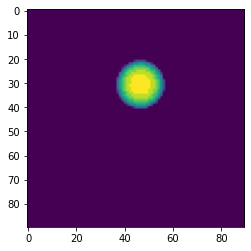

In [21]:
img = np.sum(sm_array,axis=2)
imgplot = plt.imshow(img)

In [22]:
np.sum(img)

4195.0

In [23]:
percent_pixel_1 = np.sum(img[0:int(sm_third_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_2 = np.sum(img[0:int(sm_third_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_3 = np.sum(img[0:int(sm_third_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_4 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_5 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_6 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_7 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_8 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_9 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)

In [24]:
print("% in first pixel: " + str(percent_pixel_1 * 100) + "%")
print("% in second pixel: " + str(percent_pixel_2 * 100) + "%")
print("% in third pixel: " + str(percent_pixel_3 * 100) + "%")
print("% in fourth pixel: " + str(percent_pixel_4 * 100) + "%")
print("% in fifth pixel: " + str(percent_pixel_5 * 100) + "%")
print("% in sixth pixel: " + str(percent_pixel_6 * 100) + "%")
print("% in seventh pixel: " + str(percent_pixel_7 * 100) + "%")
print("% in eigth pixel: " + str(percent_pixel_8 * 100) + "%")
print("% in ninth pixel: " + str(percent_pixel_9 * 100) + "%")

% in first pixel: 0.0%
% in second pixel: 41.69249106078665%
% in third pixel: 0.0%
% in fourth pixel: 0.0%
% in fifth pixel: 58.30750893921335%
% in sixth pixel: 0.0%
% in seventh pixel: 0.0%
% in eigth pixel: 0.0%
% in ninth pixel: 0.0%


In [25]:
detector_array[closest_pixel_x,closest_pixel_y] += percent_pixel_1 * electrons_per_photon

In [26]:
electrons_pixel_1 = round(electrons_per_photon * percent_pixel_1)
electrons_pixel_2 = round(electrons_per_photon * percent_pixel_2)
electrons_pixel_3 = round(electrons_per_photon * percent_pixel_3)
electrons_pixel_4 = round(electrons_per_photon * percent_pixel_4)
electrons_pixel_5 = round(electrons_per_photon * percent_pixel_5)
electrons_pixel_6 = round(electrons_per_photon * percent_pixel_6)
electrons_pixel_7 = round(electrons_per_photon * percent_pixel_7)
electrons_pixel_8 = round(electrons_per_photon * percent_pixel_8)
electrons_pixel_9 = round(electrons_per_photon * percent_pixel_9)

In [27]:
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [0.]
3. [0.]
4. [0.]
5. [0.]
6. [0.]
7. [0.]
8. [0.]
9. [0.]


In [28]:
detector_array[closest_pixel_x - 1, closest_pixel_y - 1] += electrons_pixel_1
detector_array[closest_pixel_x, closest_pixel_y - 1] += electrons_pixel_2
detector_array[closest_pixel_x + 1, closest_pixel_y - 1] += electrons_pixel_3
detector_array[closest_pixel_x - 1, closest_pixel_y] += electrons_pixel_4
detector_array[closest_pixel_x, closest_pixel_y] += electrons_pixel_5
detector_array[closest_pixel_x + 1, closest_pixel_y] += electrons_pixel_6
detector_array[closest_pixel_x - 1, closest_pixel_y + 1] += electrons_pixel_7
detector_array[closest_pixel_x, closest_pixel_y + 1] += electrons_pixel_8
detector_array[closest_pixel_x + 1, closest_pixel_y + 1] += electrons_pixel_9

In [29]:
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [625.]
3. [0.]
4. [0.]
5. [875.]
6. [0.]
7. [0.]
8. [0.]
9. [0.]


In [30]:
#!!! sometimes this "check" doesnt work: ask if theres a better numpy function to be precise (less likely to work when sphere is in > 2 pixels)
check_tot_electrons = np.sum(detector_array)
if (check_tot_electrons == electrons_per_photon):
    print('No rounding error. total number of electrons = ' + str(electrons_per_photon))
else:
    print('rounding error: total number of electrons is not =' + str(electrons_per_photon))

No rounding error. total number of electrons = 1500


In [31]:
#digitize array using np.digitize
#make array values integers
#how would you find the gain if you weren't given it?
#what kind of errors are introduced?
#how many times to measure a single photon to get rid of error
#numpy.digitize(x, bins, right=False(optional))
#scipy.stats.binned_statistic_2d(x, y, values, statistic='mean', bins=10, range=None, expand_binnumbers=False)
#numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)

In [ ]:
detector_array
detector_bins = np.array([15])
digitize_detector = np.digitize(detector_array, detector_bins)